In [1]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("viktor-cikojevic/three_d_seg")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })


In [2]:
df.head()   

,summary,config,name
0,"{'lr': 9.999999747378752e-05, 'threshold': 0.0...",{'aug': '<sennet.custom_modules.datasets.trans...,SMP_Unet_resnet50_imagenet-c512x1-bs8-abs8-llr...
1,"{'lr': 9.999999747378752e-05, 'epoch': 4, 'cru...",{'aug': '<sennet.custom_modules.datasets.trans...,SMP_Unet_resnet50_imagenet-c512x1-bs16-abs16-l...
2,"{'train_loss': 0.03570694103837013, 'epoch': 7...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP_Unet_resnet18_imagenet-c512x1-bs16-llr-3.5...
3,"{'_timestamp': 1704589376.1596253, 'crude_f1':...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP_Unet_resnet18_imagenet-c512x1-bs16-llr-3.5...
4,"{'crude_val_loss': 0, 'lr': 0.0003162277571391...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP_Unet_resnet18_imagenet-c512x1-bs16-llr-3.5...


In [3]:
group_names = []
for i in range(len(df)):
    try:
        group_name = df.config.iloc[i]['group_name']
        group_names.append(group_name)
    except:
        group_names.append('None')
    
df['group_name'] = group_names

In [4]:
df

,summary,config,name,group_name
0,"{'lr': 9.999999747378752e-05, 'threshold': 0.0...",{'aug': '<sennet.custom_modules.datasets.trans...,SMP_Unet_resnet50_imagenet-c512x1-bs8-abs8-llr...,r18_upsample
1,"{'lr': 9.999999747378752e-05, 'epoch': 4, 'cru...",{'aug': '<sennet.custom_modules.datasets.trans...,SMP_Unet_resnet50_imagenet-c512x1-bs16-abs16-l...,r50_k12_k3
2,"{'train_loss': 0.03570694103837013, 'epoch': 7...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP_Unet_resnet18_imagenet-c512x1-bs16-llr-3.5...,r18_replace_bn_with_ln
3,"{'_timestamp': 1704589376.1596253, 'crude_f1':...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP_Unet_resnet18_imagenet-c512x1-bs16-llr-3.5...,r18_replace_bn_with_ln
4,"{'crude_val_loss': 0, 'lr': 0.0003162277571391...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP_Unet_resnet18_imagenet-c512x1-bs16-llr-3.5...,r18_replace_bn_with_ln
...,...,...,...,...
118,"{'f1_score': 0.9075376987457277, 'train_loss':...","{'loss': [{'type': 'BCELoss', 'weight': 0.41},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
119,"{'crude_f1': 0, '_step': 1781, '_runtime': 996...","{'loss': [{'type': 'BCELoss', 'weight': 0.6100...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun
120,"{'f1_score': 0.018148032948374748, 'train_loss...","{'loss': [{'type': 'BCELoss', 'weight': 0.51},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
121,"{'_wandb': {'runtime': 3706}, 'crude_f1': 0, '...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun


In [5]:
names_public = {
	"SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32-llr-3.5-t111-sm0-2024-01-02-04-43-17": 0.813,
	"SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3.5-t111-sm0-2023-12-27-00-41-50": 0.812,
	"SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32-llr-3.5-t111-sm0-2024-01-03-09-57-11": 0.803,
	"SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs16-llr-3.5-t111-sm0-2024-01-04-07-53-55": 0.791
}

df_public = pd.DataFrame({
	'name': list(names_public.keys()),
	'surface_dice_public': list(names_public.values())
})
df_public

,name,surface_dice_public
0,SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32...,0.813
1,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,0.812
2,SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32...,0.803
3,SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs16...,0.791


In [6]:
# inner join on name
df = df.merge(df_public, on='name', how='inner')
df

,summary,config,name,group_name,surface_dice_public
0,"{'lr': 8.276629523606971e-05, 'epoch': 0, 'cru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs16...,norm_with_clip_and_kaggle_augms,0.791
1,"{'_timestamp': 1704277973.919875, 'lr': 0.0005...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32...,ema_two_stage_training,0.803
2,"{'lr-AdamW': 0.0002487321844398996, 'crude_val...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32...,reproduce_resnext50_32x4d,0.813
3,"{'train_loss': 0.026657909154891968, 'crude_f1...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun,0.812


In [7]:
df['surface_dice_local'] = df[['summary']].apply(lambda x: x['summary']['surface_dice_best'] if 'surface_dice_best' in x['summary'] else x['summary']['surface_dice'], axis=1)
df['f1_score_local'] = df[['summary']].apply(lambda x: x['summary']['f1_score'] if 'f1_score' in x['summary'] else 0, axis=1)
df

,summary,config,name,group_name,surface_dice_public,surface_dice_local,f1_score_local
0,"{'lr': 8.276629523606971e-05, 'epoch': 0, 'cru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs16...,norm_with_clip_and_kaggle_augms,0.791,0.801255,0.851997
1,"{'_timestamp': 1704277973.919875, 'lr': 0.0005...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32...,ema_two_stage_training,0.803,0.892848,0.926775
2,"{'lr-AdamW': 0.0002487321844398996, 'crude_val...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnext50_32x4d_imagenet)-c512x1-bs32...,reproduce_resnext50_32x4d,0.813,0.861540,0.903573
3,"{'train_loss': 0.026657909154891968, 'crude_f1...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun,0.812,0.887702,0.929885


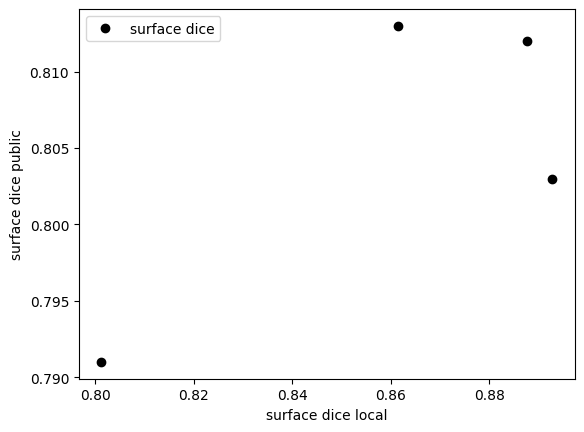

In [12]:
import matplotlib.pyplot as plt

plt.plot(df['surface_dice_local'], df['surface_dice_public'], 'o', color='black', label='surface dice')

plt.xlabel('surface dice local')
plt.ylabel('surface dice public')

plt.legend()

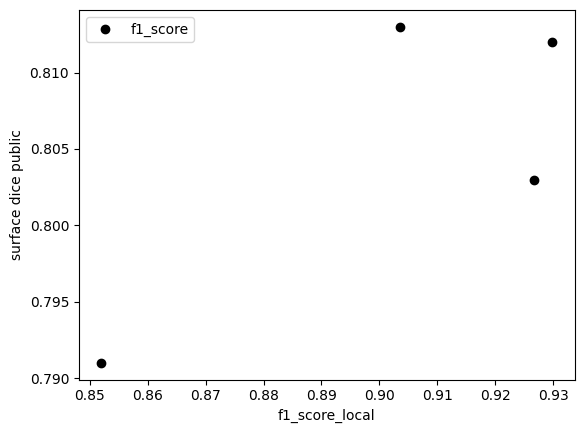

In [14]:
import matplotlib.pyplot as plt

plt.plot(df['f1_score_local'], df['surface_dice_public'], 'o', color='black', label='f1_score')

plt.xlabel('f1_score_local')
plt.ylabel('surface dice public')

plt.legend()